<a href="https://colab.research.google.com/github/Addict07/Data-Analytics/blob/main/Correlation_MoviesProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

In [132]:
#read in data
dataset = pd.read_csv("/content/movies.csv")

In [133]:
#let's look at the data
dataset.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [134]:
#check if there is any missing data
dataset.isnull().sum()/dataset.shape[0]

name        0.000000
rating      0.010042
genre       0.000000
year        0.000000
released    0.000261
score       0.000391
votes       0.000391
director    0.000000
writer      0.000391
star        0.000130
country     0.000391
budget      0.283125
gross       0.024648
company     0.002217
runtime     0.000522
dtype: float64

In [135]:
dataset['rating'] = dataset['rating'].fillna(method = 'ffill')

In [136]:
dataset['rating'].isnull().sum()

0

In [137]:
dataset['released'] = dataset['released'].fillna(method = 'ffill')

In [138]:
dataset['budget'] = dataset['budget'].fillna(0)

In [139]:
dataset = dataset.fillna(method = 'ffill')

In [140]:
dataset.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [141]:
#changing datatypes of columns
dataset['budget']= dataset['budget'].astype('int64')
dataset['gross']= dataset['gross'].astype('int64')

In [142]:
# #convert into string 
# dataset['year_correct'] = dataset['released'].astype(str).str[8:13]
# del dataset['year_correct']

In [143]:
dataset

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,13266,Dow Jazz Films,90.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,13266,Cactus Blue Entertainment,90.0
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,13266,Embi Productions,90.0
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",5.7,29.0,James Randall,James Randall,Christina Roz,United States,15000,13266,Embi Productions,120.0


In [144]:
# order by the gross
dataset = dataset.sort_values(by=['gross'], inplace = False, ascending = False)

In [145]:
# pd.set_option('display.max_rows', None)

In [146]:
#If you want to Drop any duplicates
dataset['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2385, dtype: object

In [147]:
dataset

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,0,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,Not Rated,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,0,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,0,682,Roxwell Films,93.0
2417,Madadayo,PG,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


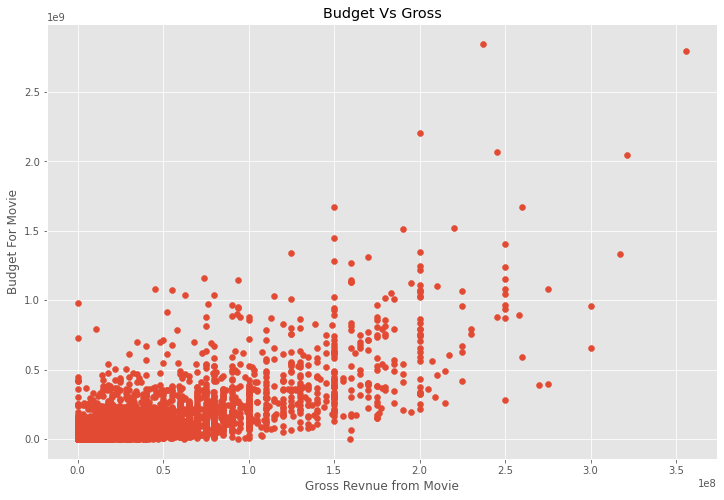

In [148]:
#scatter plot with budget vs gross
plt.scatter(x = dataset['budget'], y = dataset['gross'])
plt.title("Budget Vs Gross")
plt.xlabel("Gross Revnue from Movie")
plt.ylabel("Budget For Movie")
plt.show()


In [149]:
#The plot shows a little correlation 
#A regression plot is done


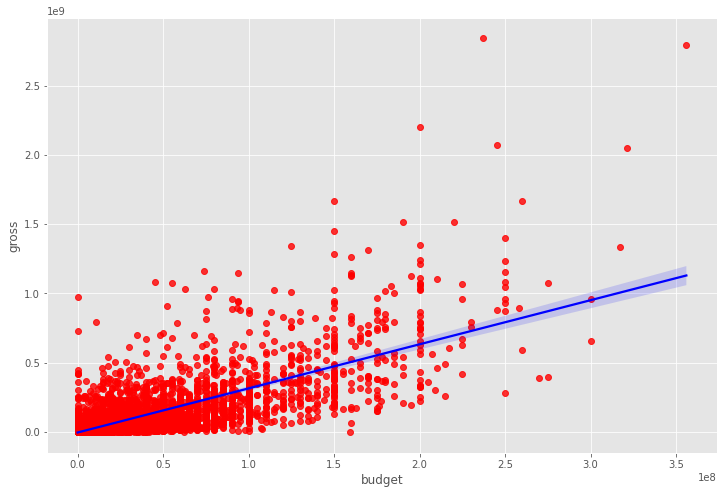

In [150]:
#Plot of budget vs gross
sns.regplot(x= dataset['budget'], y = dataset['gross'], data = dataset, scatter_kws={'color': "red"},
            line_kws={'color': 'blue'})

In [151]:
#Check for how much correlation
dataset.corr(method = 'spearman')  #Pearson, Kendall, Spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.099149,0.468107,0.291152,0.300747,0.142911
score,0.099149,1.000000,0.427638,-0.007576,0.129982,0.399181
votes,0.468107,0.427638,1.000000,0.604694,0.743063,0.290103
budget,0.291152,-0.007576,0.604694,1.000000,0.710026,0.246589
gross,0.300747,0.129982,0.743063,0.710026,1.000000,0.252273
runtime,0.142911,0.399181,0.290103,0.246589,0.252273,1.000000


In [152]:
#visualize the correlation matrix

corr_matrix  = dataset.corr(method = 'spearman')


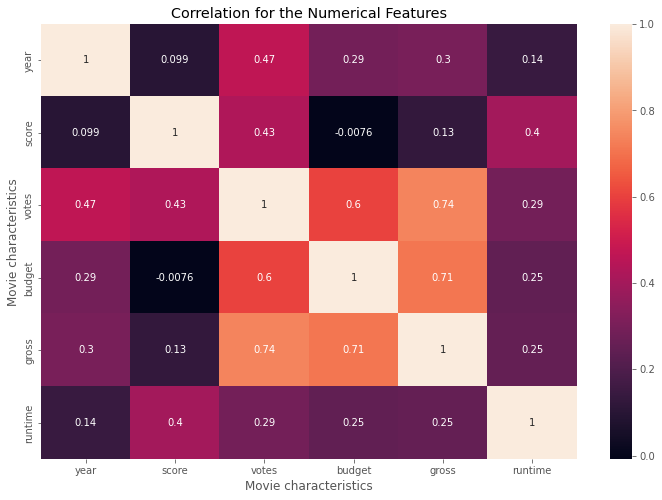

In [153]:
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation for the Numerical Features")
plt.xlabel("Movie characteristics")
plt.ylabel("Movie characteristics")
plt.show()

In [154]:
#since correlation looks at only numerical values
#we create a numerical representation for company

In [155]:
dataset.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [156]:
dataset['rating'].value_counts()

R            3733
PG-13        2125
PG           1269
Not Rated     292
G             155
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [157]:
# df = dataset

# for col_name in create_numerical:
#   if(create_numerical[col_name].dtype == 'object'):
#      create_numerical[col_name] = create_numerical[col_name].astype("category")
#      create_numerical[col_name] = create_numerical[col_name].cat.codes




df = dataset

for column in df:
  if(df[column].dtype == 'object'):
     df[column] = df[column].astype('category')
     df[column] = df[column].cat.codes

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1119,6.5,5200.0,730,1123,2319,54,0,1400,477,103.0
7625,6720,3,4,2019,1149,5.7,320.0,2546,2565,1915,55,0,790,2308,104.0
7580,4664,3,5,2019,1835,5.2,735.0,1445,2203,2278,55,0,682,1992,93.0
2417,3406,4,6,1993,85,7.3,5100.0,33,1718,2563,27,11900000,596,796,134.0


In [158]:


# dataset['name'] = dataset['name'].astype('category')
# dataset['rating'] = dataset['rating'].astype('category')
# dataset['genre'] = dataset['genre'].astype('category')
# dataset['director'] = dataset['director'].astype('category')
# dataset['writer'] = dataset['writer'].astype('category')
# dataset['star'] = dataset['star'].astype('category')
# dataset['country'] = dataset['country'].astype('category')

In [159]:
# dataset['name'] = dataset['name'].cat.codes
# dataset['rating'] = dataset['rating'].cat.codes
# dataset['genre'] = dataset['genre'].cat.codes
# dataset['director'] = dataset['director'].cat.codes
# dataset['writer'] = dataset['writer'].cat.codes
# dataset['star'] = dataset['star'].cat.codes
# dataset['country'] = dataset['country'].cat.codes

In [175]:
dataset.sort_values(by = 'gross',ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1119,6.5,5200.0,730,1123,2319,54,0,1400,477,103.0
7625,6720,3,4,2019,1149,5.7,320.0,2546,2565,1915,55,0,790,2308,104.0
7580,4664,3,5,2019,1835,5.2,735.0,1445,2203,2278,55,0,682,1992,93.0
2417,3406,4,6,1993,85,7.3,5100.0,33,1718,2563,27,11900000,596,796,134.0


In [178]:
pd.set_option('display.max_rows', 500)
correlation_matrix = df.corr(method = 'spearman')
corr_pairs = correlation_matrix.unstack()
corr_pairs

name      name        1.000000
          rating     -0.012940
          genre       0.015940
          year        0.011978
          released   -0.010744
          score       0.011682
          votes       0.008574
          director    0.008912
          writer      0.009153
          star        0.006989
          country    -0.007460
          budget      0.015350
          gross       0.001351
          company     0.010814
          runtime     0.015428
rating    name       -0.012940
          rating      1.000000
          genre       0.136995
          year        0.005011
          released    0.033200
          score       0.029710
          votes       0.006536
          director    0.010344
          writer      0.002598
          star        0.015916
          country     0.010321
          budget     -0.115770
          gross      -0.178727
          company    -0.092285
          runtime     0.073475
genre     name        0.015940
          rating      0.136995
        

In [182]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.316964
genre     budget     -0.316964
gross     genre      -0.285366
genre     gross      -0.285366
score     country    -0.218923
country   score      -0.218923
votes     genre      -0.204256
genre     votes      -0.204256
rating    gross      -0.178727
gross     rating     -0.178727
rating    budget     -0.115770
budget    rating     -0.115770
country   runtime    -0.093501
runtime   country    -0.093501
company   rating     -0.092285
rating    company    -0.092285
genre     company    -0.088428
company   genre      -0.088428
country   year       -0.088017
year      country    -0.088017
          genre      -0.081261
genre     year       -0.081261
country   genre      -0.067461
genre     country    -0.067461
gross     released   -0.047531
released  gross      -0.047531
          country    -0.028032
country   released   -0.028032
star      year       -0.027503
year      star       -0.027503
genre     runtime    -0.023334
runtime   genre      -0.023334
star    

In [184]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

budget    votes       0.604694
votes     budget      0.604694
budget    gross       0.710026
gross     budget      0.710026
          votes       0.743063
votes     gross       0.743063
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64